# Xây dựng model dự đoán một khách hàng có mua xe hay không dựa trên thông tin về ‘Age’ và ‘EstimatedSalary_K’ (mức lương ước tính – đơn vị tính 1000$)

In [1]:
# Dataset: https://www.kaggle.com/rakeshrau/social-network-ads

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
data = pd.read_csv("data/Social_Network_Ads.csv", 
                   usecols=['Age', 'EstimatedSalary_K', 'Purchased'])

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Age                400 non-null    int64
 1   EstimatedSalary_K  400 non-null    int64
 2   Purchased          400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [5]:
data.head()

,Age,EstimatedSalary_K,Purchased
0,19,19,0
1,35,20,0
2,26,43,0
3,27,57,0
4,19,76,0


In [6]:
data['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [7]:
data.describe()

,Age,EstimatedSalary_K,Purchased
count,400.000000,400.00000,400.000000
mean,37.655000,69.74250,0.357500
std,10.482877,34.09696,0.479864
min,18.000000,15.00000,0.000000
25%,29.750000,43.00000,0.000000
50%,37.000000,70.00000,0.000000
75%,46.000000,88.00000,1.000000
max,60.000000,150.00000,1.000000


In [8]:
X = data[['Age', 'EstimatedSalary_K']]
y = data['Purchased']

# Logistic Regression

In [9]:
from sklearn.model_selection import train_test_split   

In [10]:
X_train,X_test,Y_train,Y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
clf = LogisticRegression()

In [13]:
clf.fit(X_train, Y_train)

LogisticRegression()

In [14]:
print('Train score: ', clf.score(X_train,Y_train))

Train score:  0.8357142857142857


In [15]:
print('Test score: ', clf.score(X_test,Y_test))

Test score:  0.8666666666666667


In [16]:
Yhat_test = clf.predict(X_test)

In [17]:
from sklearn.metrics import accuracy_score 

In [18]:
print("Test Accuracy is ", accuracy_score(Y_test, Yhat_test)) 

Test Accuracy is  0.8666666666666667


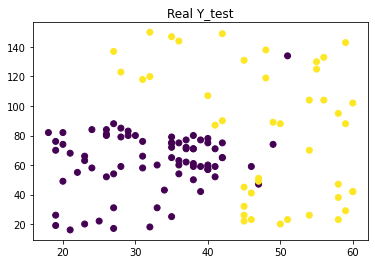

In [19]:
plt.scatter(X_test.Age , X_test.EstimatedSalary_K, c=Y_test)
plt.title('Real Y_test')
plt.show()

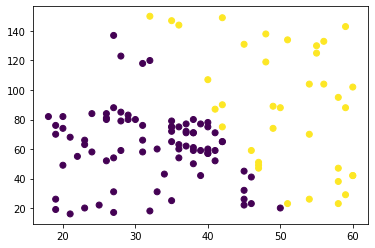

In [20]:
plt.scatter(X_test.Age , X_test.EstimatedSalary_K, c=Yhat_test)
plt.show()

In [21]:
X_now = pd.DataFrame([[40,120]], columns=X.columns)
Y_now = clf.predict(X_now)
Y_now

array([1], dtype=int64)

# Feature Selection
## SelectKBest

In [22]:
from sklearn.feature_selection import SelectKBest, chi2

In [23]:
best_features = SelectKBest(score_func=chi2, k='all')
model_fit = best_features.fit(X,y)
df_scores = pd.DataFrame(model_fit.scores_)
df_columns = pd.DataFrame(X.columns)

In [24]:
feature_scores = pd.concat([df_columns, df_scores], axis = 1)
feature_scores.columns = ['Feature', 'Score']
feature_scores.sort_values('Score', ascending = False, inplace = True, ignore_index=True)
feature_scores

,Feature,Score
0,EstimatedSalary_K,872.013169
1,Age,451.155226
